In [1]:
import numpy as np

In [2]:
domain = np.zeros((100, 100))
H_limit = 360
S_limit = 1
L_limit = 1

In [3]:
def H_dash(H): return (H % 360) / 60

In [4]:
def C(S, L): return S * (1 - np.abs(2*L - 1))

In [5]:
def X(C, H_dash): return C * (1 - np.abs(H_dash % 2 - 1))

In [29]:
def m(L, C): return L - C / 2

In [7]:
def RGB_raw(h_dash, c, x): 
    h_dash = np.array(h_dash)
    c = np.array(c)
    x = np.array(x)
    
    out = np.zeros((*h_dash.shape, 3))
    
    h_seg = hex_segment(h_dash, 0)
    out[h_seg, 0] = c[h_seg]
    out[h_seg, 1] = x[h_seg]
    out[h_seg, 2] = 0.
    
    h_seg = hex_segment(h_dash, 1)
    out[h_seg, 0] = x[h_seg]
    out[h_seg, 1] = c[h_seg]
    out[h_seg, 2] = 0.
    
    h_seg = hex_segment(h_dash, 2)
    out[h_seg, 0] = 0.
    out[h_seg, 1] = c[h_seg]
    out[h_seg, 2] = x[h_seg]
    
    h_seg = hex_segment(h_dash, 3)
    out[h_seg, 0] = 0.
    out[h_seg, 1] = x[h_seg]
    out[h_seg, 2] = c[h_seg]
    
    h_seg = hex_segment(h_dash, 4)
    out[h_seg, 0] = x[h_seg]
    out[h_seg, 1] = 0.
    out[h_seg, 2] = c[h_seg]
    
    h_seg = hex_segment(h_dash, 5)
    out[h_seg, 0] = c[h_seg]
    out[h_seg, 1] = 0.
    out[h_seg, 2] = x[h_seg]
    
    return out

In [8]:
def hex_segment(h_dash, seg):
    return (h_dash >= seg) & (h_dash < seg + 1)

In [43]:
def RGB_normalise(RGB, m): 
    RGB_reshaped = np.moveaxis(RGB, -1, 0)
    out = np.moveaxis(RGB_reshaped + m, 0, -1)
    return out

In [10]:
def hsl2rgb(H, S, L):
    h_dash = H_dash(H)
    c = C(S, L)
    x = X(c, h_dash)
    return RGB_normalise(RGB_raw(h_dash, c, x), m(L, c))

In [11]:
h = np.random.rand(3, 3) * 360
s = np.random.rand(3, 3)
l = np.random.rand(3, 3)

In [12]:
h_dash = H_dash(h)

In [13]:
c = C(s, l)
x = X(c, h_dash)

In [14]:
hsl2rgb(40, 0.7, 0.3)

array([0.51, 0.37, 0.09])

In [15]:
hsl2rgb(h, s, l)

array([[[0.12691779, 0.16647687, 0.61397025],
        [0.29495187, 0.09970652, 0.16538584],
        [0.19506904, 0.04649951, 1.34871779]],

       [[0.70852882, 0.2889046 , 0.5290784 ],
        [0.46713147, 0.07021244, 0.16538584],
        [0.676511  , 0.34912314, 0.94422942]],

       [[0.04427429, 0.16647687, 0.5343871 ],
        [0.72124614, 0.02339883, 0.18796495],
        [0.20819873, 0.04438003, 0.99692181]]])

In [83]:
x = np.linspace(0, 720, 720, endpoint=False)
y = np.linspace(0, 1, 360, endpoint=False)
x_1, y_1 = np.meshgrid(x, y)
x_1, y_1

def RGB_square_grid(resolution, l=0.5, h_min=0, h_max=360, s_min=0, s_max=1, l_min=0, l_max=1):
    
    h = np.linspace(h_min, h_max, resolution[0], endpoint=False)
    s = np.linspace(s_min, s_max, resolution[1], endpoint=False)
    
    if len(resolution) == 2:
        h_1, s_1 = np.meshgrid(h, s)
        l_1 = l
    elif len(resolution) == 3:
        l = np.linspace(l_min, l_max, resolution[2], endpoint=False)
        h_1, s_1, l_1 = np.meshgrid(h, s, l)
    else:
        print(len(resolution))
        return -1
        
    return hsl2rgb(h_1, s_1, l_1)

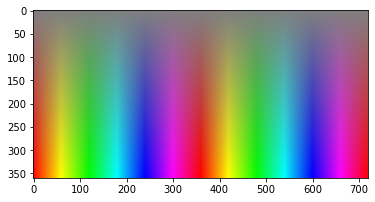

In [64]:
import matplotlib.pyplot as plt

a = hsl2rgb(x_1, y_1, 0.5)
plt.imshow(a)

In [84]:
a = np.array([3])
a

array([3])

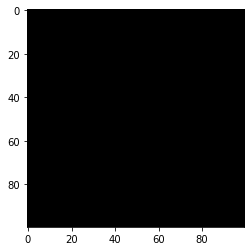

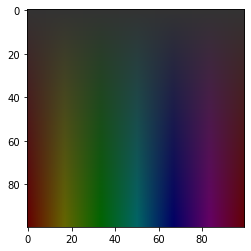

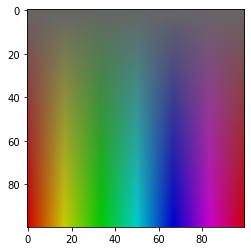

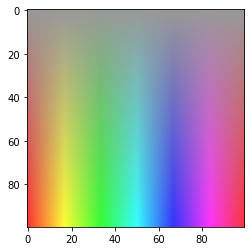

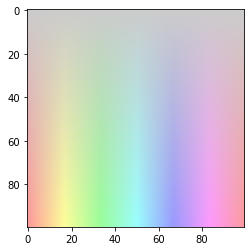

In [88]:
a = RGB_square_grid((100, 100, 5))
for i in range(5):
    plt.figure()
    plt.imshow(a[:, :, i])

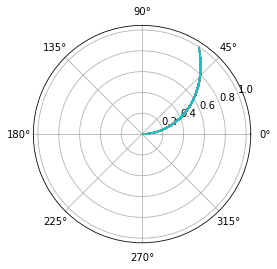

In [90]:
a = RGB_square_grid((100, 100))
plt.polar(*a)